In [4]:
!pwd

/Users/ausubo/ds/metis/temporary/metis-benson


In [5]:
import csv
import collections
from dateutil.parser import parser
import datetime
import csv
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
turnstiles1 = pd.read_csv('turnstile_160507.txt')
turnstiles2 = pd.read_csv('turnstile_160514.txt')
turnstiles3 = pd.read_csv('turnstile_160521.txt')
turnstiles4 = pd.read_csv('turnstile_160528.txt')

turnstile_df = pd.concat([turnstiles1, turnstiles2, turnstiles3, turnstiles4], ignore_index = True)

In [7]:
turnstile_df.columns = turnstile_df.columns.str.strip()

In [8]:
turnstile_df['DATETIME'] = turnstile_df['DATE'] + ' ' + turnstile_df['TIME']
turnstile_df['DATETIME'] = turnstile_df['DATETIME'].apply(parser)


In [9]:
#THIS STEP TAKES FOREVER!!!!!
m =turnstile_df['DATE']

turnstile_df['dayofweek'] = pd.to_datetime(m).dt.dayofweek


In [10]:
turnstile_df['STATIONLINE'] = turnstile_df['STATION'] + turnstile_df['LINENAME']

In [11]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,<dateutil.parser.parser object at 0x114aafe10>,5,59 STNQR456
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,<dateutil.parser.parser object at 0x114ad4b10>,5,59 STNQR456
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,<dateutil.parser.parser object at 0x114ad4fd0>,5,59 STNQR456
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,<dateutil.parser.parser object at 0x116945090>,5,59 STNQR456
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,<dateutil.parser.parser object at 0x1169450d0>,5,59 STNQR456


In [12]:
test = turnstile_df.groupby(['STATIONLINE', 'C/A', 'UNIT', 'SCP'])

# did we have to do groupby at this stage to take the diff? 

In [13]:
test.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,<dateutil.parser.parser object at 0x114aafe10>,5,59 STNQR456
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,<dateutil.parser.parser object at 0x114ad4b10>,5,59 STNQR456
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,<dateutil.parser.parser object at 0x114ad4fd0>,5,59 STNQR456
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,<dateutil.parser.parser object at 0x116945090>,5,59 STNQR456
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,<dateutil.parser.parser object at 0x1169450d0>,5,59 STNQR456
43,A002,R051,02-00-01,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5180722,1137502,<dateutil.parser.parser object at 0x116945a90>,5,59 STNQR456
44,A002,R051,02-00-01,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5180750,1137503,<dateutil.parser.parser object at 0x116945ad0>,5,59 STNQR456
45,A002,R051,02-00-01,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5180770,1137518,<dateutil.parser.parser object at 0x116945b10>,5,59 STNQR456
46,A002,R051,02-00-01,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5180925,1137577,<dateutil.parser.parser object at 0x116945b50>,5,59 STNQR456
47,A002,R051,02-00-01,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5181200,1137624,<dateutil.parser.parser object at 0x116945b90>,5,59 STNQR456


### We groupby'd above so we could then take the diff in the columns by turnstile not overall!!!! 

In [14]:
turnstile_df['net_in'] = test['ENTRIES'].transform(pd.Series.diff)
turnstile_df['net_out'] = test['EXITS'].transform(pd.Series.diff) 

In [15]:
turnstile_df['net_in'].value_counts()

 0.0           111411
 1.0            13293
 2.0             9155
 3.0             8115
 4.0             7413
 5.0             7046
 6.0             6707
 7.0             6358
 8.0             6092
 9.0             6054
 10.0            5748
 11.0            5575
 12.0            5382
 13.0            5282
 14.0            5124
 15.0            4956
 16.0            4750
 17.0            4620
 18.0            4468
 19.0            4455
 20.0            4335
 21.0            4125
 22.0            3955
 23.0            3867
 24.0            3807
 25.0            3591
 26.0            3539
 27.0            3513
 28.0            3419
 29.0            3281
                ...  
-834.0              1
-837.0              1
-893.0              1
-892.0              1
-889.0              1
-888.0              1
-886.0              1
-885.0              1
-881.0              1
-880.0              1
-875.0              1
-874.0              1
-873.0              1
-872.0              1
-869.0    

In [16]:
turnstile_df['net_out'].value_counts()

 0.0       111824
 1.0        15032
 2.0        12104
 3.0        11020
 4.0        10008
 5.0         9269
 6.0         8855
 7.0         8353
 8.0         7723
 9.0         7415
 10.0        7094
 11.0        6863
 12.0        6595
 13.0        6198
 14.0        6021
 15.0        5826
 16.0        5565
 17.0        5382
 18.0        5211
 19.0        4917
 20.0        4905
 21.0        4845
 22.0        4623
 23.0        4610
 25.0        4406
 24.0        4405
 26.0        4181
 27.0        4174
 28.0        3976
 29.0        3898
            ...  
 2564.0         1
 2568.0         1
-954.0          1
-953.0          1
 2569.0         1
-947.0          1
-945.0          1
-943.0          1
-941.0          1
-940.0          1
 2573.0         1
 2574.0         1
-935.0          1
-930.0          1
-904.0          1
 2576.0         1
-928.0          1
-927.0          1
 2577.0         1
 2581.0         1
-922.0          1
-921.0          1
-920.0          1
-919.0          1
-913.0    

In [17]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE,net_in,net_out
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,<dateutil.parser.parser object at 0x114aafe10>,5,59 STNQR456,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,<dateutil.parser.parser object at 0x114ad4b10>,5,59 STNQR456,50.0,10.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,<dateutil.parser.parser object at 0x114ad4fd0>,5,59 STNQR456,23.0,31.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,<dateutil.parser.parser object at 0x116945090>,5,59 STNQR456,144.0,110.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,<dateutil.parser.parser object at 0x1169450d0>,5,59 STNQR456,296.0,63.0


In [18]:
# why 5000? 
# confused: wouldn't it make sense to get rid of all foo < 0? 

foo = turnstile_df['net_in']
from __future__ import division
print len(foo[foo>5000])/len(foo)/.01, "%"
print len(foo[foo<-5000])/len(foo)/.01, "%"
print len(foo[foo<0])/len(foo)/0.01, "%"
print len(foo[foo<0])/len(foo[foo<-5000]) # 54-fold increase in # dropped... 

0.012340315038 %
0.0134972195728 %
0.733091840224 %
54.3142857143


In [19]:
turnstile_df[turnstile_df['net_in']>5000] = np.nan
turnstile_df[turnstile_df['net_in']<-5000] = np.nan
turnstile_df['net_in'] = np.abs(turnstile_df['net_in'])  # see point above

turnstile_df[turnstile_df['net_out']>5000] = np.nan
turnstile_df[turnstile_df['net_out']<-5000] = np.nan
turnstile_df['net_out']=np.abs(turnstile_df['net_out']) # see point above 
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE,net_in,net_out
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941.0,1909983.0,<dateutil.parser.parser object at 0x114aafe10>,5.0,59 STNQR456,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991.0,1909993.0,<dateutil.parser.parser object at 0x114ad4b10>,5.0,59 STNQR456,50.0,10.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014.0,1910024.0,<dateutil.parser.parser object at 0x114ad4fd0>,5.0,59 STNQR456,23.0,31.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158.0,1910134.0,<dateutil.parser.parser object at 0x116945090>,5.0,59 STNQR456,144.0,110.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454.0,1910197.0,<dateutil.parser.parser object at 0x1169450d0>,5.0,59 STNQR456,296.0,63.0


In [20]:
turnstile_df['net_sum']= turnstile_df['net_in']+ turnstile_df['net_out']  
# cual es el efecto de sacar los net_in, net_out < -5000 y no los < 0? ?? 

In [21]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE,net_in,net_out,net_sum
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941.0,1909983.0,<dateutil.parser.parser object at 0x114aafe10>,5.0,59 STNQR456,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991.0,1909993.0,<dateutil.parser.parser object at 0x114ad4b10>,5.0,59 STNQR456,50.0,10.0,60.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014.0,1910024.0,<dateutil.parser.parser object at 0x114ad4fd0>,5.0,59 STNQR456,23.0,31.0,54.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158.0,1910134.0,<dateutil.parser.parser object at 0x116945090>,5.0,59 STNQR456,144.0,110.0,254.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454.0,1910197.0,<dateutil.parser.parser object at 0x1169450d0>,5.0,59 STNQR456,296.0,63.0,359.0


In [22]:
daily_entry = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_in'].sum()

In [23]:
daily_entry

STATIONLINE           dayofweek
1 AVL                 0.0           90124.0
                      1.0           98424.0
                      2.0          101540.0
                      3.0          102213.0
                      4.0          104350.0
                      5.0           79365.0
                      6.0           67660.0
103 ST-CORONA7        0.0           81666.0
                      1.0           81824.0
                      2.0           83832.0
                      3.0           83540.0
                      4.0           83346.0
                      5.0           56712.0
                      6.0           46431.0
103 ST1               0.0           52848.0
                      1.0           56547.0
                      2.0           47920.0
                      3.0           42871.0
                      4.0           43313.0
                      5.0           39373.0
                      6.0           34756.0
103 ST6               0.0           46501.0


In [24]:
daily_entry = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_in'].sum()
daily_exit = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_out'].sum()
daily_total = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_sum'].sum()

In [25]:
daily_entry = daily_entry.reset_index()
daily_exit = daily_exit.reset_index()
daily_total = daily_total.reset_index()

In [26]:
total_entry = turnstile_df.groupby(['STATIONLINE'])['net_in'].sum()

In [27]:
total_entry.head()

STATIONLINE
1 AVL             643676.0
103 ST-CORONA7    517351.0
103 ST1           317628.0
103 ST6           292701.0
103 STBC          125673.0
Name: net_in, dtype: float64

In [28]:
total_entry = turnstile_df.groupby(['STATIONLINE'])['net_in'].sum()
total_exit = turnstile_df.groupby(['STATIONLINE'])['net_out'].sum()

In [29]:
total = total_entry.add(total_exit)
summary = pd.concat([total_entry, total_exit, total], axis=1)

In [30]:
summary.columns = ['total_entry', 'total_exit', 'total_traffic']

In [31]:
summary.head()

,total_entry,total_exit,total_traffic
STATIONLINE,,,
1 AVL,643676.0,654721.0,1298397.0
103 ST-CORONA7,517351.0,378553.0,895904.0
103 ST1,317628.0,145532.0,463160.0
103 ST6,292701.0,148108.0,440809.0
103 STBC,125673.0,90333.0,216006.0


In [32]:
summary = summary.reset_index()

In [33]:
summary.head()

,STATIONLINE,total_entry,total_exit,total_traffic
0,1 AVL,643676.0,654721.0,1298397.0
1,103 ST-CORONA7,517351.0,378553.0,895904.0
2,103 ST1,317628.0,145532.0,463160.0
3,103 ST6,292701.0,148108.0,440809.0
4,103 STBC,125673.0,90333.0,216006.0


In [34]:
summary_total = summary.sort_values(by = 'total_traffic', ascending = False)

In [35]:
summary_total.head(10)

,STATIONLINE,total_entry,total_exit,total_traffic
309,GRD CNTRL-42 ST4567S,3606847.0,3194237.0,6801084.0
90,34 ST-HERALD SQBDFMNQR,3079692.0,2719583.0,5799275.0
442,TIMES SQ-42 ST1237ACENQRS,2201328.0,1828694.0,4030022.0
103,42 ST-PORT AUTHACENQRS1237,2281541.0,1523053.0,3804594.0
94,34 ST-PENN STAACE,2002397.0,1798088.0,3800485.0
25,14 ST-UNION SQLNQR456,1873490.0,1597535.0,3471025.0
156,86 ST456,1667180.0,1532008.0,3199188.0
107,47-50 STS ROCKBDFM,1419826.0,1474352.0,2894178.0
286,FLUSHING-MAIN7,1556444.0,1241369.0,2797813.0
123,59 ST COLUMBUSABCD1,1528813.0,1184572.0,2713385.0


In [36]:
summary_total.sum()

STATIONLINE      GRD CNTRL-42 ST4567S34 ST-HERALD SQBDFMNQRTIME...
total_entry                                            1.48235e+08
total_exit                                             1.11185e+08
total_traffic                                           2.5942e+08
dtype: object

In [37]:
total_entries = summary_total.sum()[1]
total_exits = summary_total.sum()[2]
total_overall_traffic = summary_total.sum()[3]

In [38]:
print total_entries
print total_exits
print total_overall_traffic

148235327.0
111184660.0
259419987.0


In [39]:
summary_total['total_normalized'] = summary_total['total_traffic']/total_overall_traffic

In [40]:
summary_total['entries_normalized'] = summary_total['total_entry']/total_entries

In [41]:
summary_total['exits_normalized'] = summary_total['total_exit']/total_exits

In [42]:
summary_total.columns

Index([u'STATIONLINE', u'total_entry', u'total_exit', u'total_traffic',
       u'total_normalized', u'entries_normalized', u'exits_normalized'],
      dtype='object')

In [43]:
summary_total['p_total'] = summary_total['total_traffic']/total_overall_traffic

In [44]:
summary_total['p_entry'] = summary_total['total_entry']/total_entries

In [45]:
summary_total['p_exit'] = summary_total['total_exit']/total_exits

In [46]:
summary_total.head()

,STATIONLINE,total_entry,total_exit,total_traffic,total_normalized,entries_normalized,exits_normalized,p_total,p_entry,p_exit
309,GRD CNTRL-42 ST4567S,3606847.0,3194237.0,6801084.0,0.026216,0.024332,0.028729,0.026216,0.024332,0.028729
90,34 ST-HERALD SQBDFMNQR,3079692.0,2719583.0,5799275.0,0.022355,0.020776,0.024460,0.022355,0.020776,0.024460
442,TIMES SQ-42 ST1237ACENQRS,2201328.0,1828694.0,4030022.0,0.015535,0.014850,0.016447,0.015535,0.014850,0.016447
103,42 ST-PORT AUTHACENQRS1237,2281541.0,1523053.0,3804594.0,0.014666,0.015391,0.013698,0.014666,0.015391,0.013698
94,34 ST-PENN STAACE,2002397.0,1798088.0,3800485.0,0.014650,0.013508,0.016172,0.014650,0.013508,0.016172


In [47]:
summary_total.head()

,STATIONLINE,total_entry,total_exit,total_traffic,total_normalized,entries_normalized,exits_normalized,p_total,p_entry,p_exit
309,GRD CNTRL-42 ST4567S,3606847.0,3194237.0,6801084.0,0.026216,0.024332,0.028729,0.026216,0.024332,0.028729
90,34 ST-HERALD SQBDFMNQR,3079692.0,2719583.0,5799275.0,0.022355,0.020776,0.024460,0.022355,0.020776,0.024460
442,TIMES SQ-42 ST1237ACENQRS,2201328.0,1828694.0,4030022.0,0.015535,0.014850,0.016447,0.015535,0.014850,0.016447
103,42 ST-PORT AUTHACENQRS1237,2281541.0,1523053.0,3804594.0,0.014666,0.015391,0.013698,0.014666,0.015391,0.013698
94,34 ST-PENN STAACE,2002397.0,1798088.0,3800485.0,0.014650,0.013508,0.016172,0.014650,0.013508,0.016172


In [48]:
by_stationline_norm = summary_total[['STATIONLINE', 'total_normalized', 'entries_normalized', 'exits_normalized']]

In [49]:
cumulative = by_stationline_norm.cumsum(axis=None, dtype=None, out=None, skipna=True)

In [50]:
cumulative['STATIONLINE'] = by_stationline_norm['STATIONLINE']

In [51]:
cumulative.head(10)

,STATIONLINE,total_normalized,entries_normalized,exits_normalized
309,GRD CNTRL-42 ST4567S,0.0262165,0.0243319,0.0287291
90,34 ST-HERALD SQBDFMNQR,0.0485713,0.0451076,0.0531892
442,TIMES SQ-42 ST1237ACENQRS,0.064106,0.0599578,0.0696365
103,42 ST-PORT AUTHACENQRS1237,0.0787718,0.0753492,0.0833349
94,34 ST-PENN STAACE,0.0934217,0.0888574,0.099507
25,14 ST-UNION SQLNQR456,0.106802,0.101496,0.113875
156,86 ST456,0.119134,0.112743,0.127654
107,47-50 STS ROCKBDFM,0.13029,0.122321,0.140915
286,FLUSHING-MAIN7,0.141075,0.132821,0.15208
123,59 ST COLUMBUSABCD1,0.151534,0.143134,0.162734


In [52]:
names = cumulative.columns.tolist()
names

['STATIONLINE', 'total_normalized', 'entries_normalized', 'exits_normalized']

In [53]:
names[names.index('total_normalized')] = 'total_cumulative'
names[names.index('entries_normalized')] = 'entries_cumulative'
names[names.index('exits_normalized')] = 'exits_cumulative'

cumulative.columns = names

In [54]:
cumulative.head(10)

,STATIONLINE,total_cumulative,entries_cumulative,exits_cumulative
309,GRD CNTRL-42 ST4567S,0.0262165,0.0243319,0.0287291
90,34 ST-HERALD SQBDFMNQR,0.0485713,0.0451076,0.0531892
442,TIMES SQ-42 ST1237ACENQRS,0.064106,0.0599578,0.0696365
103,42 ST-PORT AUTHACENQRS1237,0.0787718,0.0753492,0.0833349
94,34 ST-PENN STAACE,0.0934217,0.0888574,0.099507
25,14 ST-UNION SQLNQR456,0.106802,0.101496,0.113875
156,86 ST456,0.119134,0.112743,0.127654
107,47-50 STS ROCKBDFM,0.13029,0.122321,0.140915
286,FLUSHING-MAIN7,0.141075,0.132821,0.15208
123,59 ST COLUMBUSABCD1,0.151534,0.143134,0.162734


In [55]:
len(cumulative['STATIONLINE'])

470

In [56]:
from __future__ import division
to_470 = np.arange(1, len(cumulative['STATIONLINE']) + 1)/len(cumulative['STATIONLINE'])

In [57]:
cumulative.tail()

,STATIONLINE,total_cumulative,entries_cumulative,exits_cumulative
201,BEACH 98 STAS,0.999824,0.999759,0.999912
444,TOMPKINSVILLE1,0.999905,0.9999,0.999912
194,BEACH 105 STAS,0.999961,0.999947,0.999979
218,BROAD CHANNELAS,1,1,1
394,ORCHARD BEACH6,1,1,1


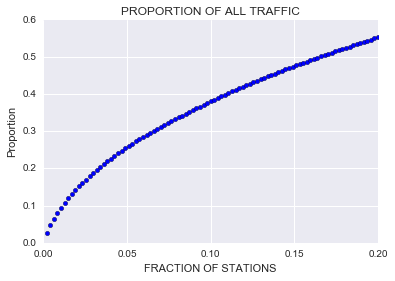

In [58]:
frame = plt.gca()

plt.scatter(to_470, cumulative['total_cumulative'])
plt.ylabel('Proportion')
plt.xlabel('FRACTION OF STATIONS')
plt.title('PROPORTION OF ALL TRAFFIC')
plt.ylim((0,0.6))
plt.xlim((0, 0.2))

plt.savefig('cumulative_prob_dist_scatter_zoomed.png', dpi = 300, bbox_inches = 'tight')


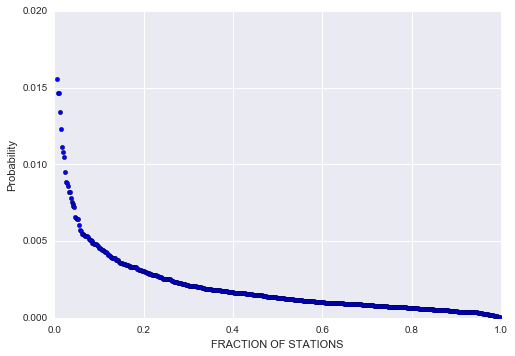

In [87]:
frame = plt.gca()

plt.scatter(to_470, summary_total['p_total'])
plt.ylabel('Probability')
plt.xlabel('FRACTION OF STATIONS')
plt.title('')
plt.ylim((0,0.02))
plt.xlim((0, 1))

plt.savefig('prob_dist_TEST.png', dpi = 300, bbox_inches = 'tight')


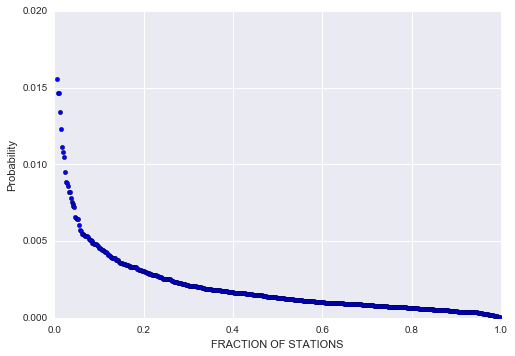

In [87]:
frame = plt.gca()

plt.scatter(to_470, summary_total['p_total'])
plt.ylabel('Probability')
plt.xlabel('FRACTION OF STATIONS')
plt.title('')
plt.ylim((0,0.02))
plt.xlim((0, 1))
plt.xlabel(size)
plt.savefig('prob_dist_TEST.png', dpi = 300, bbox_inches = 'tight')


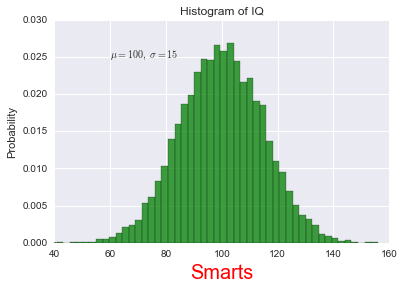

In [62]:


mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts', fontsize=20, color='red')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [60]:
plt.text?

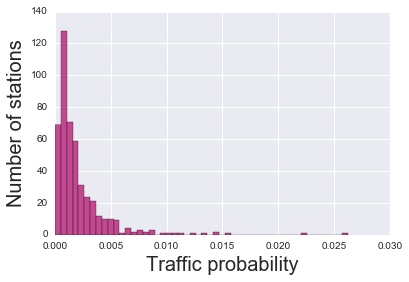

In [72]:
frame = plt.gca()

plt.hist(summary_total['p_total'], bins = 50, color = "#C24890")
plt.ylabel('Number of stations', fontsize = 20)
plt.xlabel('Traffic probability', fontsize = 20)
# plt.text(0.01, 30, r'We look at stations that', fontsize = 14, color = 'blue')
# plt.text(0.01, 20, r'handle the most traffic.', fontsize = 14, color = 'blue')

plt.savefig('histogram_normalized_by_total_overall_traffic.png', dpi = 300, bbox_inches = 'tight')


In [89]:
summary_total.columns

Index([u'STATIONLINE', u'total_entry', u'total_exit', u'total_traffic',
       u'total_normalized', u'entries_normalized', u'exits_normalized',
       u'p_total', u'p_entry', u'p_exit'],
      dtype='object')

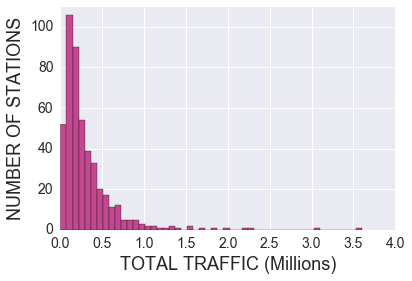

In [76]:
#frame = plt.gca()

#ax = frame.add_subplot(111)

fig = plt.figure(dpi = 300)
ax  = fig.add_subplot(111)

plt.hist(summary_total['total_entry'], bins = 50, color = "#C24890")
plt.ylabel('NUMBER OF STATIONS', fontsize = 18)
plt.xlabel('TOTAL TRAFFIC (Millions)', fontsize = 18)
ax.set_xticklabels(np.arange(0, 4.5, 0.5))
labels = [""]
plt.savefig('histogram_RAW.png', dpi = 300, bbox_inches = 'tight')
plt.ylim((0,110))
plt.tick_params(axis='both', which='major', labelsize=14)



In [113]:
!pwd

/Users/ausubo/ds/metis/temporary/mta-turnstile/mta-turnstile-master


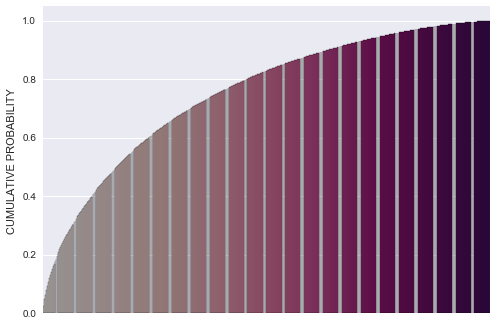

In [116]:
# initial plot - to be refined

frame1 = plt.gca()

sns.barplot(x = 'STATIONLINE', y = 'total_cumulative', data = cumulative, saturation = 0.75, palette = 'RdPu')


#x = cumulative['STATION']
#y = cumulative['total_cumulative']
#plt.plot(y[:10])
#plt.xticks(rotation=90)
#plt.xlabel('')
plt.ylabel('CUMULATIVE PROBABILITY')
#plt.title('CUMULATIVE PROBABILITY DISTRIBUTION')
frame1.axes.get_xaxis().set_visible(False)
plt.ylim((0,1.05))

plt.savefig('cumulative_prob_dist.png', dpi = 300, bbox_inches = 'tight')


In [118]:
topstation_name = ['GRD CNTRL-42 ST (4567S)',
 '34 ST-HERALD SQ (BDFMNQR)',
 'TIMES SQ-42 ST (1237ACENQRS)',
 '42 ST-PORT AUTH (ACENQRS1237)',
 '34 ST-PENN STA (ACE)',
 '14 ST-UNION SQ (LNQR456)',
 '86 ST (456)',
 '47-50 STS ROCK (BDFM)',
 'FLUSHING-MAIN (7)',
 '59 ST COLUMBUS (ABCD1)']

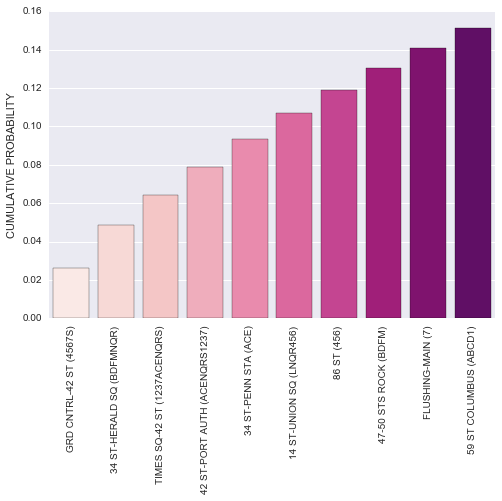

In [119]:
# initial plot - to be refined

#frame2 =plt.gca()
#plt.tight_layout()

fig2 = plt.figure(dpi = 300)
ax1  = fig2.add_subplot(111)

sns.barplot(x = 'STATIONLINE', y = 'total_cumulative', data = cumulative.head(10), saturation = 0.75, palette = 'RdPu')

ax1.set_xlabel('CUMULATIVE PROBABILITY')
ax1.set_xticklabels(topstation_name)
#x = cumulative['STATION']
#y = cumulative['total_cumulative']
#plt.plot(y[:10])
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('CUMULATIVE PROBABILITY')
#ax2.set_yticklabels(topstation_name[::-1])
ax1.set_xticklabels(topstation_name)

#plt.title('CUMULATIVE PROBABILITY DISTRIBUTION')
frame1.axes.get_xaxis().set_visible(False)
plt.ylim((0,0.16))


#plt.savefig('cumul_prob_dist_top10_v2.png', dpi = 300)
fig2.savefig('cumul_prob_dist_top10.png', dpi =300, bbox_inches = 'tight')


In [120]:
topten = summary.sort_values(by = ['total_traffic'], ascending = False).head(10)

In [121]:
topten

,STATIONLINE,total_entry,total_exit,total_traffic
309,GRD CNTRL-42 ST4567S,3606847.0,3194237.0,6801084.0
90,34 ST-HERALD SQBDFMNQR,3079692.0,2719583.0,5799275.0
442,TIMES SQ-42 ST1237ACENQRS,2201328.0,1828694.0,4030022.0
103,42 ST-PORT AUTHACENQRS1237,2281541.0,1523053.0,3804594.0
94,34 ST-PENN STAACE,2002397.0,1798088.0,3800485.0
25,14 ST-UNION SQLNQR456,1873490.0,1597535.0,3471025.0
156,86 ST456,1667180.0,1532008.0,3199188.0
107,47-50 STS ROCKBDFM,1419826.0,1474352.0,2894178.0
286,FLUSHING-MAIN7,1556444.0,1241369.0,2797813.0
123,59 ST COLUMBUSABCD1,1528813.0,1184572.0,2713385.0


In [122]:
toptwenty = summary.sort_values(by = ['total_traffic'], ascending = False).head(20)

In [123]:
toptwenty

,STATIONLINE,total_entry,total_exit,total_traffic
309,GRD CNTRL-42 ST4567S,3606847.0,3194237.0,6801084.0
90,34 ST-HERALD SQBDFMNQR,3079692.0,2719583.0,5799275.0
442,TIMES SQ-42 ST1237ACENQRS,2201328.0,1828694.0,4030022.0
103,42 ST-PORT AUTHACENQRS1237,2281541.0,1523053.0,3804594.0
94,34 ST-PENN STAACE,2002397.0,1798088.0,3800485.0
25,14 ST-UNION SQLNQR456,1873490.0,1597535.0,3471025.0
156,86 ST456,1667180.0,1532008.0,3199188.0
107,47-50 STS ROCKBDFM,1419826.0,1474352.0,2894178.0
286,FLUSHING-MAIN7,1556444.0,1241369.0,2797813.0
123,59 ST COLUMBUSABCD1,1528813.0,1184572.0,2713385.0


In [124]:
list(topten['STATIONLINE'])

['GRD CNTRL-42 ST4567S',
 '34 ST-HERALD SQBDFMNQR',
 'TIMES SQ-42 ST1237ACENQRS',
 '42 ST-PORT AUTHACENQRS1237',
 '34 ST-PENN STAACE',
 '14 ST-UNION SQLNQR456',
 '86 ST456',
 '47-50 STS ROCKBDFM',
 'FLUSHING-MAIN7',
 '59 ST COLUMBUSABCD1']

In [125]:
topstation = list(topten['STATIONLINE'])

In [127]:
daily_total.head(14)


,STATIONLINE,dayofweek,net_sum
0,1 AVL,0.0,183985.0
1,1 AVL,1.0,197009.0
2,1 AVL,2.0,203848.0
3,1 AVL,3.0,203952.0
4,1 AVL,4.0,211002.0
5,1 AVL,5.0,160379.0
6,1 AVL,6.0,138222.0
7,103 ST-CORONA7,0.0,135256.0
8,103 ST-CORONA7,1.0,140617.0
9,103 ST-CORONA7,2.0,142611.0


In [128]:
clr = np.arange(0, 1.1, 0.1)

In [129]:
clr

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [130]:
topstation

['GRD CNTRL-42 ST4567S',
 '34 ST-HERALD SQBDFMNQR',
 'TIMES SQ-42 ST1237ACENQRS',
 '42 ST-PORT AUTHACENQRS1237',
 '34 ST-PENN STAACE',
 '14 ST-UNION SQLNQR456',
 '86 ST456',
 '47-50 STS ROCKBDFM',
 'FLUSHING-MAIN7',
 '59 ST COLUMBUSABCD1']

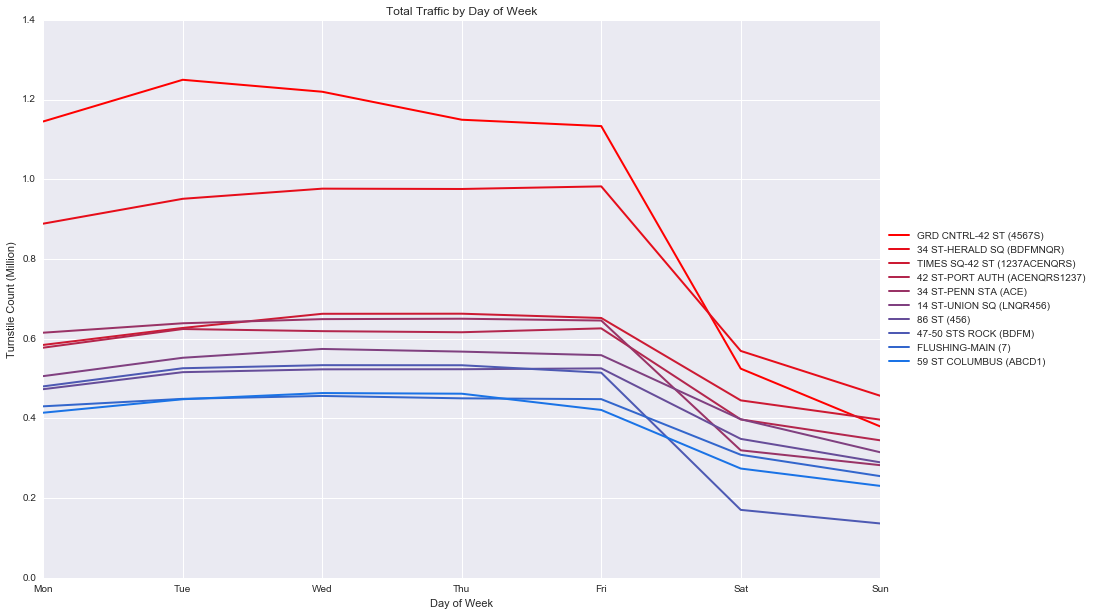

In [133]:
fig1 = plt.figure(dpi = 600, figsize = (15, 10))
ax1  = fig1.add_subplot(111)
clr = np.arange(0, 1.1, 0.1)

for i in topstation:
    station_total = daily_total[daily_total['STATIONLINE']==i]
    x = np.array(station_total['dayofweek'])
    y = np.array(station_total['net_sum'])
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = topstation_name[index], color = c, linewidth = 2.0)
ax1.set_xlabel('Day of Week')
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax1.set_yticklabels(np.arange(0.0, 1.6, 0.2))
ax1.set_ylabel('Turnstile Count (Million)')
ax1.set_title('Total Traffic by Day of Week')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


In [136]:
topten

,STATIONLINE,total_entry,total_exit,total_traffic
309,GRD CNTRL-42 ST4567S,3606847.0,3194237.0,6801084.0
90,34 ST-HERALD SQBDFMNQR,3079692.0,2719583.0,5799275.0
442,TIMES SQ-42 ST1237ACENQRS,2201328.0,1828694.0,4030022.0
103,42 ST-PORT AUTHACENQRS1237,2281541.0,1523053.0,3804594.0
94,34 ST-PENN STAACE,2002397.0,1798088.0,3800485.0
25,14 ST-UNION SQLNQR456,1873490.0,1597535.0,3471025.0
156,86 ST456,1667180.0,1532008.0,3199188.0
107,47-50 STS ROCKBDFM,1419826.0,1474352.0,2894178.0
286,FLUSHING-MAIN7,1556444.0,1241369.0,2797813.0
123,59 ST COLUMBUSABCD1,1528813.0,1184572.0,2713385.0


In [140]:
t_en = np.array(topten['total_entry'])[::-1]
t = np.array(topten['total_traffic'])[::-1]

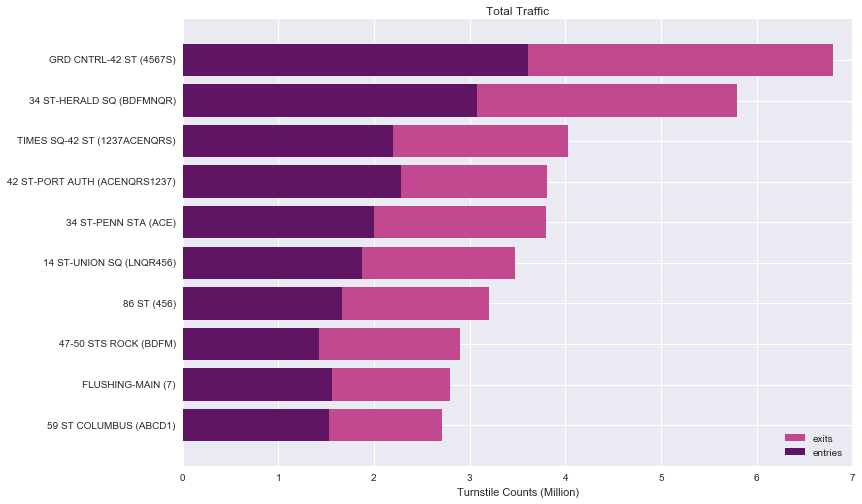

In [143]:
fig2 = plt.figure(dpi = 400, figsize = (12, 8))
ax2  = fig2.add_subplot(111)
ax2.barh(range(0, 10), t, color = '#C24890', label = 'exits', align = 'center', edgecolor = "none")
ax2.barh(range(0, 10), t_en, color = '#5F1564', label = 'entries', align = 'center', edgecolor = "none")
ax2.set_yticks(range(0,10))
ax2.set_yticklabels(topstation_name[::-1])
ax2.set_xlabel('Turnstile Counts (Million)')
ax2.set_xticklabels(range(0,8))
plt.ylim(-1, 10)
plt.title('Total Traffic')
plt.legend(loc = 'best');
fig2.savefig('Fig1.png')

In [ ]:
weekday_data = turnstile_df[turnstile_df['dayofweek']<5]

In [ ]:
weekday_data['st2']=weekday_data['STATIONLINE']

In [ ]:
weekday_data_to = weekday_data[weekday_data['st2'].isin(topstation)]

In [ ]:
m1 = weekday_data_to['STATIONLINE']
m2 = weekday_data_to['TIME']
m3 = weekday_data_to['net_sum']

In [ ]:
m_new = pd.concat([m1, m2, m3], axis=1)

In [ ]:
hslot = []
h= []
for i in m_new['TIME']:
    i = str(i)
    hour = int(i[:2])
    if hour == 0:
        hslot.append(6)
    elif hour > 0 and hour <= 4:
        hslot.append(1)
    elif hour <=8:
        hslot.append(2)
    elif hour <=12:
        hslot.append(3)
    elif hour <=16:
        hslot.append(4)
    elif hour<=20:
        hslot.append(5)
    else:
        hslot.append(6)


In [ ]:
m_new['hslot'] = hslot

In [ ]:
stationbyhour = m_new.groupby(['STATIONLINE', 'hslot'])['net_sum'].sum()

In [ ]:
stationbyhour= stationbyhour.reset_index()

In [ ]:
stationbyhour

In [ ]:
clr = numpy.arange(0, 1.1, 0.1)

fig1 = plt.figure()
ax1 = fig1.add_axes([0, 0, 1, 1])
for i in topstation:
    station_hour = stationbyhour[stationbyhour['STATIONLINE']==i]
    x = numpy.array(station_hour['hslot'])
    y = numpy.array(station_hour['net_sum'])
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = topstation_name[index], color = c)
ax1.set_xlabel('time slots of a weekday')
ax1.set_xticklabels(['0-4', '5-8', '9-12', '13-16', '17-20', '21-24'])
ax1.set_ylabel('Total Traffic')
ax1.set_title('Total Traffic by daily time slots')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));